# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable


## External links and resources
Paste here all the links to external resources that are necessary to understand and run your code. Add descriptions to make it clear how to use them during evaluation.

## Introduction
Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

## Development
Start coding here! 👩‍💻

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

# **Import Libraries**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Import Data**

In [17]:
# Data entities file

In [18]:
data_entities = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/data_entities.csv', encoding = 'Latin-1')
print(len(data_entities))
data_entities.head()

186


,entity_id,name,latitude,longitude,entity_type,street,start_date,end_date
0,testsixsq,Rua dos Campeões Europeus,41.162590,-8.585198,TrafficFlowObserved,Rua dos Campeões Europeus,NaN,NaN
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,R. Camões - N-S,41.154960,-8.610091,TrafficFlowObserved,Rua de Camões,NaN,NaN
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,Av. Boavista - Casa da Música - E-O,41.158701,-8.633546,TrafficFlowObserved,Avenida da Boavista,NaN,NaN
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,Via Panorâmica - Faixa BUS,41.151096,-8.633818,TrafficFlowObserved,Rua de Entre Campos,NaN,NaN


In [19]:
data_entities.groupby(['entity_type'])['entity_id'].count()

entity_type
AirQualityObserved      10
NoiseLevelObserved      18
TrafficFlowObserved    130
WeatherObserved         28
Name: entity_id, dtype: int64

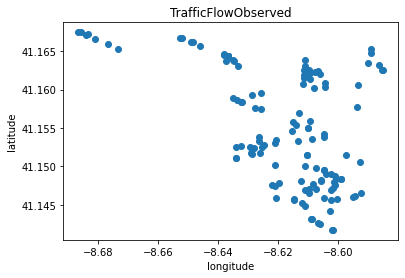

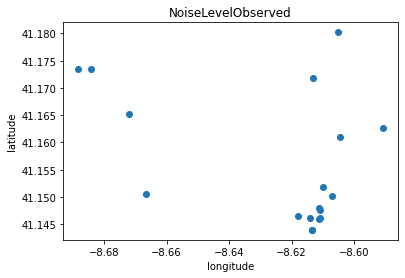

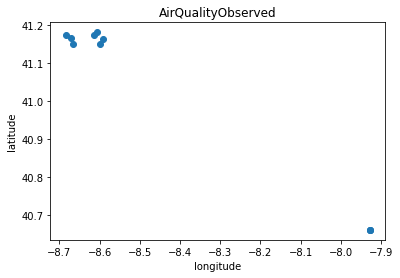

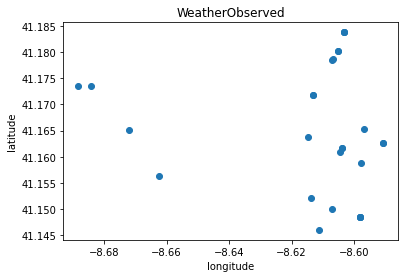

In [20]:
for i in data_entities['entity_type'].unique():
    data_f = data_entities[data_entities['entity_type']==i][['longitude','latitude']]
    plt.scatter(data_f['longitude'], data_f['latitude'])
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title(i)
    plt.show()

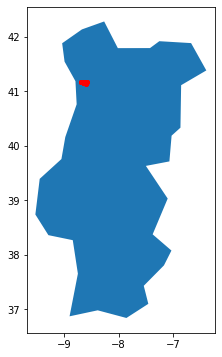

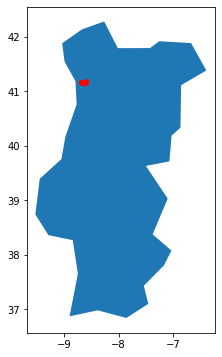

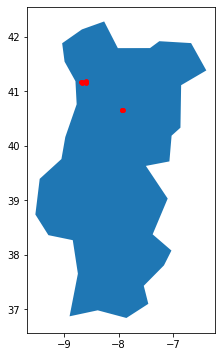

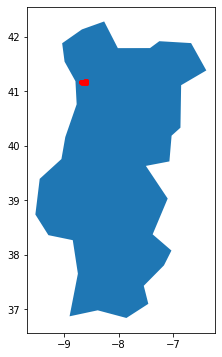

In [31]:
# Plot them on map

#!pip install shapely
#!pip install geopandas
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

for i in data_entities['entity_type'].unique():
    df = data_entities[data_entities['entity_type']==i][['longitude','latitude']]
    geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
    gdf = GeoDataFrame(df, geometry=geometry) 
    #this is a simple map that goes with geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world[world['name']=='Portugal'].plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [32]:
# So most of them are from single area, so scatter plot suffices

In [34]:
print(len(data_entities['entity_id'].unique()))
data_entities['entity_id'].unique()
# Entitiy names structure is different for each entity type

181


array(['testsixsq',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z3',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z4',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z5',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z8',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z9',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT11Z1',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT11Z2',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT11Z3',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT11Z5',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT11Z8',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT11Z9',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT12Z1',
       'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT12Z2',
       'urn:ngsi-ld:TrafficFlowObserved:po

In [36]:
# Read other datasets

In [37]:
#traffic_sensor_2016 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/traffic_data/traffic_flow_2016.csv', encoding = 'Latin-1')
#traffic_sensor_2017 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/traffic_data/traffic_flow_2017.csv', encoding = 'Latin-1')
#traffic_sensor_2018 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/traffic_data/traffic_flow_2018.csv', encoding = 'Latin-1')
#traffic_sensor_2019 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/traffic_data/traffic_flow_2019.csv', encoding = 'Latin-1')
#traffic_sensor_2020 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/traffic_data/traffic_flow_2020.csv', encoding = 'Latin-1')
traffic_sensor_2021 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/traffic_data/traffic_flow_2021.csv', encoding = 'Latin-1')
#len(traffic_sensor_2016),len(traffic_sensor_2017),len(traffic_sensor_2018),len(traffic_sensor_2019),len(traffic_sensor_2020),
len(traffic_sensor_2021)

1778491

In [38]:
#traffic_sensor_2021.to_csv('traffic_flow_2021.csv', index = False)

In [39]:
#air_quality_2018 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/air_quality/air_quality_2018.csv', encoding = 'Latin-1')
#air_quality_2019 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/air_quality/air_quality_2019.csv', encoding = 'Latin-1')
#air_quality_2020 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/air_quality/air_quality_2020.csv', encoding = 'Latin-1')
air_quality_2021 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/air_quality/air_quality_2021.csv', encoding = 'Latin-1')
#len(air_quality_2018),len(air_quality_2019),len(air_quality_2020),
len(air_quality_2021)

164077

In [40]:
#air_quality_2021.to_csv('air_quality_2021.csv', index = False)

In [41]:
#noise_level_2018 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/noise_level/noise_level_2018.csv', encoding = 'Latin-1')
#noise_level_2019 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/noise_level/noise_level_2019.csv', encoding = 'Latin-1')
#noise_level_2020 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/noise_level/noise_level_2020.csv', encoding = 'Latin-1')
noise_level_2021 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/noise_level/noise_level_2021.csv', encoding = 'Latin-1')
#len(noise_level_2018),len(noise_level_2019),len(noise_level_2020),
len(noise_level_2021)

394839

In [43]:
#noise_level_2021.to_csv('noise_level_2021.csv', index = False)

In [45]:
#weather_observed_2018 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/weather_observed/weather_observed_2018.csv', encoding = 'Latin-1')
#weather_observed_2019 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/weather_observed/weather_observed_2019.csv', encoding = 'Latin-1')
#weather_observed_2020 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/weather_observed/weather_observed_2020.csv', encoding = 'Latin-1')
weather_observed_2021 = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/weather_observed/weather_observed_2021.csv', encoding = 'Latin-1')
#len(weather_observed_2018),len(weather_observed_2019),len(weather_observed_2020),
len(weather_observed_2021)

259322

In [47]:
#weather_observed_2021.to_csv('weather_observed_2021.csv', index = False)

In [48]:
# Check column names

In [49]:
# Columns on 2021 data
traffic_sensor_2021.columns

Index(['entity_id', 'entity_type', 'dateobservedfrom', 'dateobservedto',
       'dataprovider', 'intensity', 'source', 'laneid', 'lanedirection',
       'date_from', 'time_from', 'name'],
      dtype='object')

In [50]:
air_quality_2021.columns

Index(['dateobserved', 'entity_id', 'entity_type', 'no2', 'o3', 'ox', 'co',
       'pm1', 'pm25', 'pm10', 'latitude', 'longitude', 'observed_date',
       'observed_time', 'name'],
      dtype='object')

In [51]:
noise_level_2021.columns

Index(['dateobserved', 'entity_id', 'entity_type', 'laeq', 'latitude',
       'longitude', 'observed_date', 'observed_time', 'name'],
      dtype='object')

In [52]:
weather_observed_2021.columns

Index(['dateobserved', 'entity_id', 'entity_type', 'barometricpressure',
       'dewpoint', 'precipitation', 'relativehumidity', 'solarradiation',
       'temperature', 'winddirection', 'windspeed', 'source', 'dataprovider',
       'illuminance', 'uvindexmax', 'pressuretendency', 'observed_date',
       'observed_time', 'name'],
      dtype='object')

In [53]:
# Check sample data

In [54]:
traffic_sensor_2021.head()

,entity_id,entity_type,dateobservedfrom,dateobservedto,dataprovider,intensity,source,laneid,lanedirection,date_from,time_from,name
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-02-15 22:20:00,2021-02-15 22:25:00,NaN,6,NaN,1,NaN,2021-02-15,22:20:00.0000000,R. Alegria
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-02-15 22:20:00,2021-02-15 22:25:00,NaN,10,NaN,1,NaN,2021-02-15,22:20:00.0000000,R. Santa Catarina - S-N
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-02-15 22:15:00,2021-02-15 22:20:00,NaN,9,NaN,1,NaN,2021-02-15,22:15:00.0000000,Av.Sidónio Pais O-E - Rotunda
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-01-28 13:15:00,2021-01-28 13:20:00,NaN,12,NaN,1,NaN,2021-01-28,13:15:00.0000000,Av. Fernão Magalhães N-S - Túnel
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-01-28 13:15:00,2021-01-28 13:20:00,NaN,14,NaN,1,NaN,2021-01-28,13:15:00.0000000,Av. Fernão de Magalhães - Francisco Sá Carneiro


In [55]:
air_quality_2021.head()

,dateobserved,entity_id,entity_type,no2,o3,ox,co,pm1,pm25,pm10,latitude,longitude,observed_date,observed_time,name
0,2021-01-02 02:36:04,urn:ngsi-ld:AirQualityObserved:porto:environme...,AirQualityObserved,29.299999,20.900000,51.500000,532.900024,2.5,3.5,8.3,41.173528,-8.684325,2021-01-02,02:36:04.0000000,Queimódromo
1,2021-01-02 02:40:41,urn:ngsi-ld:AirQualityObserved:porto:environme...,AirQualityObserved,29.299999,20.900000,51.500000,532.900024,2.0,3.0,7.6,41.173528,-8.684325,2021-01-02,02:40:41.0000000,Queimódromo
2,2021-01-02 02:46:19,urn:ngsi-ld:AirQualityObserved:porto:environme...,AirQualityObserved,28.600000,27.200001,57.099998,419.399994,2.0,3.0,7.5,41.173528,-8.684325,2021-01-02,02:46:19.0000000,Queimódromo
3,2021-01-02 02:50:56,urn:ngsi-ld:AirQualityObserved:porto:environme...,AirQualityObserved,28.600000,27.200001,57.099998,419.399994,2.0,3.0,7.5,41.173528,-8.684325,2021-01-02,02:50:56.0000000,Queimódromo
4,2021-01-02 02:56:33,urn:ngsi-ld:AirQualityObserved:porto:environme...,AirQualityObserved,28.600000,27.200001,57.099998,419.399994,1.9,2.9,7.4,41.173528,-8.684325,2021-01-02,02:56:33.0000000,Queimódromo


In [56]:
noise_level_2021.head()

,dateobserved,entity_id,entity_type,laeq,latitude,longitude,observed_date,observed_time,name
0,2021-01-27 03:05:05,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,NoiseLevelObserved,54.400002,41.161009,-8.604408,2021-01-27,03:05:05.0000000,Marquês
1,2021-01-27 03:10:07,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,NoiseLevelObserved,58.500000,41.161009,-8.604408,2021-01-27,03:10:07.0000000,Marquês
2,2021-01-27 03:15:09,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,NoiseLevelObserved,54.799999,41.161009,-8.604408,2021-01-27,03:15:09.0000000,Marquês
3,2021-01-27 03:20:11,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,NoiseLevelObserved,53.400002,41.161009,-8.604408,2021-01-27,03:20:11.0000000,Marquês
4,2021-01-27 03:25:13,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,NoiseLevelObserved,55.799999,41.161009,-8.604408,2021-01-27,03:25:13.0000000,Marquês


In [57]:
weather_observed_2021.head()

,dateobserved,entity_id,entity_type,barometricpressure,dewpoint,precipitation,relativehumidity,solarradiation,temperature,winddirection,windspeed,source,dataprovider,illuminance,uvindexmax,pressuretendency,observed_date,observed_time,name
0,2021-01-01 19:06:04,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,WeatherObserved,NaN,NaN,0.0,0.89,NaN,8.7,0,0.000000,NaN,NaN,NaN,0,NaN,2021-01-01,19:06:04.0000000,Anémona
1,2021-01-01 19:10:13,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,WeatherObserved,NaN,NaN,0.0,0.89,NaN,8.5,0,0.000000,NaN,NaN,NaN,0,NaN,2021-01-01,19:10:13.0000000,Anémona
2,2021-01-01 19:20:59,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,WeatherObserved,NaN,NaN,0.0,0.92,NaN,6.7,308,0.888889,NaN,NaN,NaN,0,NaN,2021-01-01,19:20:59.0000000,Pólo Asprela
3,2021-01-01 19:20:43,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,WeatherObserved,NaN,NaN,0.0,0.94,NaN,6.7,323,0.916667,NaN,NaN,NaN,0,NaN,2021-01-01,19:20:43.0000000,Av. Fernão de Magalhães
4,2021-01-01 19:30:21,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,WeatherObserved,NaN,NaN,0.0,0.92,NaN,6.7,308,1.083333,NaN,NaN,NaN,0,NaN,2021-01-01,19:30:21.0000000,Pólo Asprela


In [58]:
weather_observed_2021.describe()

,barometricpressure,dewpoint,precipitation,relativehumidity,solarradiation,temperature,winddirection,windspeed,source,dataprovider,illuminance,uvindexmax,pressuretendency
count,0.0,0.0,259322.000000,259322.000000,113120.000000,259322.000000,259322.000000,259322.000000,0.0,0.0,0.0,259322.000000,0.0
mean,NaN,NaN,0.013083,0.790206,89.218555,12.048316,166.362264,1.414073,NaN,NaN,NaN,0.275638,NaN
std,NaN,NaN,0.077589,0.245538,166.444306,4.463293,106.697915,1.395861,NaN,NaN,NaN,0.638724,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,-0.900000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,0.000000,0.700000,0.200000,9.600000,95.000000,0.444444,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,0.000000,0.870000,0.500000,12.900000,160.000000,1.083333,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,0.000000,0.980000,98.900002,14.200000,261.000000,1.972222,NaN,NaN,NaN,0.000000,NaN
max,NaN,NaN,4.200000,1.000000,841.599976,30.700001,360.000000,17.250000,NaN,NaN,NaN,5.000000,NaN


In [59]:
# Profiling of main data-frame

In [60]:
traffic_sensor_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778491 entries, 0 to 1778490
Data columns (total 12 columns):
entity_id           object
entity_type         object
dateobservedfrom    object
dateobservedto      object
dataprovider        float64
intensity           int64
source              float64
laneid              int64
lanedirection       float64
date_from           object
time_from           object
name                object
dtypes: float64(3), int64(2), object(7)
memory usage: 162.8+ MB


In [61]:
traffic_sensor_2021.describe()

,dataprovider,intensity,source,laneid,lanedirection
count,0.0,1.778491e+06,0.0,1778491.0,0.0
mean,NaN,3.348608e+01,NaN,1.0,NaN
std,NaN,1.940210e+02,NaN,0.0,NaN
min,NaN,1.000000e+00,NaN,1.0,NaN
25%,NaN,4.000000e+00,NaN,1.0,NaN
50%,NaN,1.300000e+01,NaN,1.0,NaN
75%,NaN,2.800000e+01,NaN,1.0,NaN
max,NaN,4.515000e+03,NaN,1.0,NaN


In [62]:
# So, data provider is not present, neither is source, and lanedirection, and landid is also constant only.

# Data Cleaning and Preprocessing

Check for Duplicate entries 

In [63]:
print(f'Duplicate entries in Dataset:{traffic_sensor_2021.duplicated().sum()}')

Duplicate entries in Dataset:537


In [64]:
len(traffic_sensor_2021)

1778491

In [65]:
traffic_sensor_2021 = traffic_sensor_2021.drop_duplicates()
len(traffic_sensor_2021)

1777954

Check for Missing values

In [66]:
print(f'Count of Missing values:{traffic_sensor_2021.isnull().sum()}')

Count of Missing values:entity_id                 0
entity_type               0
dateobservedfrom          0
dateobservedto            0
dataprovider        1777954
intensity                 0
source              1777954
laneid                    0
lanedirection       1777954
date_from                 0
time_from                 0
name                      0
dtype: int64


Removing Columns with majority of missing values

In [67]:
traffic_sensor_2021.drop(columns=['dataprovider','source','lanedirection'],inplace=True)

In [68]:
print(f'Count of Missing values:{traffic_sensor_2021.isnull().sum()}')

Count of Missing values:entity_id           0
entity_type         0
dateobservedfrom    0
dateobservedto      0
intensity           0
laneid              0
date_from           0
time_from           0
name                0
dtype: int64


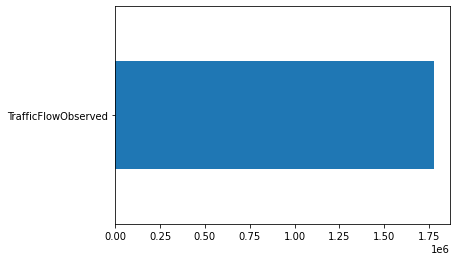

In [69]:
traffic_sensor_2021.entity_type.value_counts().plot(kind='barh')
plt.show()

In [73]:
# Which areas are most present

In [74]:
traffic_sensor_2021.name.value_counts()

Av.Boavista - O-E                       25759
R. Clube dos Fenianos                   25291
R. Heróis e dos Mártires de Angola      25227
Av.Sidónio Pais - Cruzamento - O-E      25221
Rua de João Pedro Ribeiro - São Brás    25182
                                        ...  
Av. Boavista - H.Militar - E-O             12
Av. Fernão Magalhães                        5
R. Fernandes Tomás - Continente             3
Av. de França                               3
R. Piedade                                  1
Name: name, Length: 91, dtype: int64

In [75]:
traffic_sensor_2021.entity_id.value_counts()

urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT4Z10    25759
urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT21Z3    25291
urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT3Z3     25227
urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z8    25221
urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT14Z9    25182
                                                            ...  
urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT1Z4        12
urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT3Z7         5
urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT14Z2        3
urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT4Z4         3
urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT3Z5         1
Name: entity_id, Length: 91, dtype: int64

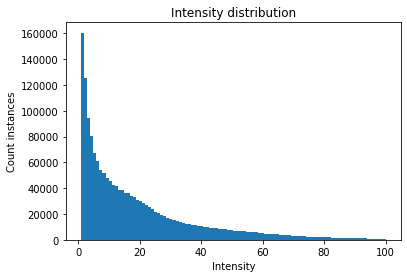

In [81]:
plt.hist(traffic_sensor_2021['intensity'], bins = 100, range = [1,100])
plt.xlabel('Intensity')
plt.ylabel('Count instances')
plt.title('Intensity distribution')
plt.show()

In [82]:
# Devide day into periods
# We are taking 'hour' as a period as we believe it's a balance between full day vs every minute data
# Hour will have seasonality in night as well

In [83]:
# Hour of the day
traffic_sensor_2021['hour'] = pd.to_datetime(traffic_sensor_2021['time_from']).dt.hour
air_quality_2021['hour'] = pd.to_datetime(air_quality_2021['observed_time']).dt.hour
noise_level_2021['hour'] = pd.to_datetime(noise_level_2021['observed_time']).dt.hour
weather_observed_2021['hour'] = pd.to_datetime(weather_observed_2021['observed_time']).dt.hour

In [84]:
# Data distribution across hour of day

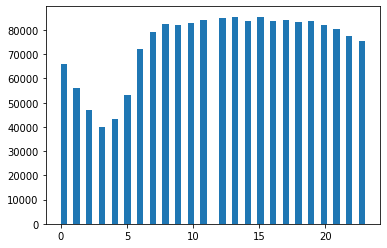

In [85]:
plt.hist(traffic_sensor_2021['hour'], bins = 48)
plt.show()

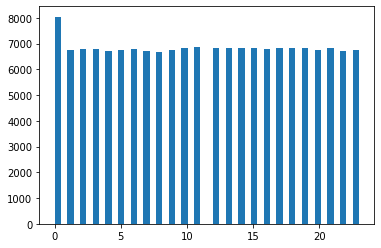

In [86]:
plt.hist(air_quality_2021['hour'], bins = 48)
plt.show()

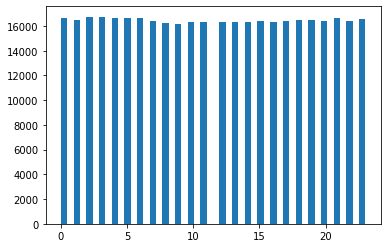

In [87]:
plt.hist(noise_level_2021['hour'], bins = 48)
plt.show()

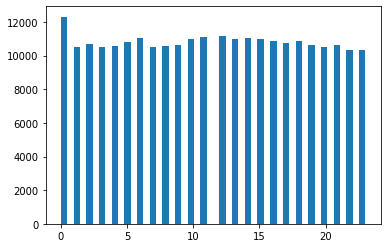

In [88]:
plt.hist(weather_observed_2021['hour'], bins = 48)
plt.show()

In [89]:
# So data distribution across hours of day seem balanced, not skewed.
# Next we will check on metrics, across hours

In [91]:
# EDA
# Traffic sensors data

In [92]:
# Convert to timestamp datatype
traffic_sensor_2021['dateobservedfrom'] = pd.to_datetime(traffic_sensor_2021['dateobservedfrom'])
traffic_sensor_2021['dateobservedto'] = pd.to_datetime(traffic_sensor_2021['dateobservedto'])

<AxesSubplot:xlabel='dateobservedfrom'>

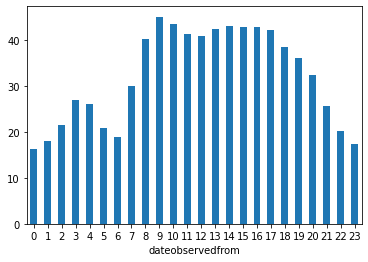

In [93]:
# Hour-wise mean intensity
traffic_sensor_2021.groupby(traffic_sensor_2021["dateobservedfrom"].dt.hour)["intensity"].mean().plot(kind='bar', rot=0)

In [94]:
# As Expected, The average Traffic intensity is higher during the peak hours of the day.
# It is the highest at 9 AM in the  morning when most people commute to work/schools.

In [96]:
traffic_porto_sensors = pd.merge(traffic_sensor_2021,data_entities,how='left', on=['entity_id','name'])
traffic_porto_sensors.head()

,entity_id,entity_type_x,dateobservedfrom,dateobservedto,intensity,laneid,date_from,time_from,name,hour,latitude,longitude,entity_type_y,street,start_date,end_date
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-02-15 22:20:00,2021-02-15 22:25:00,6,1,2021-02-15,22:20:00.0000000,R. Alegria,22,41.148976,-8.604051,TrafficFlowObserved,Rua da Alegria,NaN,NaN
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-02-15 22:20:00,2021-02-15 22:25:00,10,1,2021-02-15,22:20:00.0000000,R. Santa Catarina - S-N,22,41.153855,-8.604710,TrafficFlowObserved,Rua de Santa Catarina,NaN,NaN
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-02-15 22:15:00,2021-02-15 22:20:00,9,1,2021-02-15,22:15:00.0000000,Av.Sidónio Pais O-E - Rotunda,22,41.164548,-8.638126,TrafficFlowObserved,Avenida Sidónio Pais,NaN,NaN
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-01-28 13:15:00,2021-01-28 13:20:00,12,1,2021-01-28,13:15:00.0000000,Av. Fernão Magalhães N-S - Túnel,13,41.164806,-8.589135,TrafficFlowObserved,Avenida Fernão Magalhães,NaN,NaN
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-01-28 13:15:00,2021-01-28 13:20:00,14,1,2021-01-28,13:15:00.0000000,Av. Fernão de Magalhães - Francisco Sá Carneiro,13,41.163434,-8.590074,TrafficFlowObserved,Avenida Fernão Magalhães,NaN,NaN


In [98]:
# Largest 3 areas
traffic_porto_sensors.street.value_counts().nlargest(3)

Rua de Antero de Quental    143129
Avenida Sidónio Pais         97651
Rua de Fernandes Tomás       93553
Name: street, dtype: int64

In [105]:
traffic_porto_sensors_top3 = traffic_porto_sensors.loc[traffic_porto_sensors['street'].isin(['Rua de Antero de Quental',
                                                                                             'Avenida Sidónio Pais',
                                                                                             'Rua de Fernandes Tomás'])]
traffic_porto_sensors_top3.head()

,entity_id,entity_type_x,dateobservedfrom,dateobservedto,intensity,laneid,date_from,time_from,name,hour,latitude,longitude,entity_type_y,street,start_date,end_date
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-02-15 22:15:00,2021-02-15 22:20:00,9,1,2021-02-15,22:15:00.0000000,Av.Sidónio Pais O-E - Rotunda,22,41.164548,-8.638126,TrafficFlowObserved,Avenida Sidónio Pais,NaN,NaN
7,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-01-28 13:15:00,2021-01-28 13:20:00,11,1,2021-01-28,13:15:00.0000000,R. Antero Quental - Damião de Góis - S-N,13,41.160727,-8.611552,TrafficFlowObserved,Rua de Antero de Quental,NaN,NaN
11,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-03-02 10:20:00,2021-03-02 10:25:00,10,1,2021-03-02,10:20:00.0000000,R. Fernandes Tomás - 24 de Agosto,10,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN
12,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-03-02 10:20:00,2021-03-02 10:25:00,12,1,2021-03-02,10:20:00.0000000,R. Fernandes Tomás - Dr. Alves da Veiga,10,41.149043,-8.602405,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN
20,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,TrafficFlowObserved,2021-01-24 00:50:00,2021-01-24 00:55:00,4,1,2021-01-24,00:50:00.0000000,R. Fernandes Tomás - Oliveirinhas,0,41.148750,-8.600898,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN


In [107]:
traffic_intensities = traffic_porto_sensors_top3.pivot_table(index="dateobservedfrom", 
                                                             columns="street", 
                                                             values="intensity", aggfunc='mean')

traffic_intensities.head()

street,Avenida Sidónio Pais,Rua de Antero de Quental,Rua de Fernandes Tomás
dateobservedfrom,,,
2020-12-31 00:10:00,15.00,4.166667,7.75
2020-12-31 00:15:00,10.00,5.833333,5.75
2020-12-31 00:20:00,10.25,5.333333,4.00
2020-12-31 01:10:00,5.75,1.200000,4.00
2020-12-31 01:35:00,3.50,2.666667,3.25


In [109]:
traffic_intensities.tail()

street,Avenida Sidónio Pais,Rua de Antero de Quental,Rua de Fernandes Tomás
dateobservedfrom,,,
2021-04-09 05:30:00,5.25,1.600000,1.000000
2021-04-09 05:35:00,4.25,2.800000,NaN
2021-04-09 05:40:00,6.75,2.166667,2.000000
2021-04-09 05:45:00,6.75,4.000000,2.750000
2021-04-09 05:50:00,6.75,4.600000,2.666667


<AxesSubplot:xlabel='dateobservedfrom'>

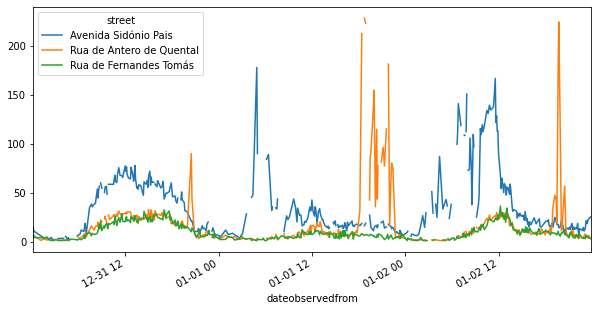

In [112]:
traffic_intensities["2020-12-31":"2021-01-02"].plot(figsize=(10,5))

<AxesSubplot:xlabel='dateobservedfrom'>

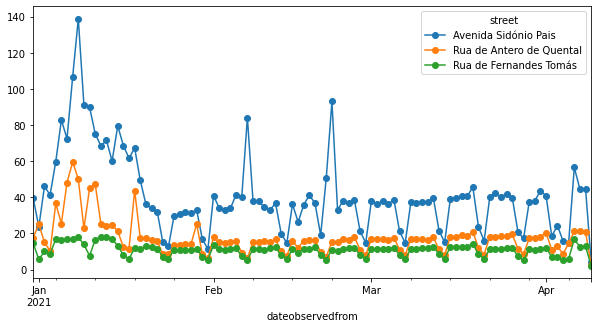

In [114]:
# Day-wise intensity
traffic_intensities.resample("D").mean().plot(style="-o", figsize=(10, 5))

In [115]:
#Daily average Traffic Intensity has reduced from March 2021 onwards. Due to third wave ???

In [116]:
# Aggeregation

In [397]:
traffic_flow_grp = traffic_sensor_2021.groupby(['entity_id','date_from','hour'])['intensity'].sum().reset_index()
traffic_flow_grp = traffic_flow_grp.rename(columns = {'date_from':'observed_date'})
print(len(traffic_flow_grp))
traffic_flow_grp.head()

183348


,entity_id,observed_date,hour,intensity
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,0,20
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,1,8
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,2,4
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,3,4
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,4,5


In [520]:
traffic_flow_grp.tail(5)

,entity_id,observed_date,hour,intensity,latitude,longitude
183343,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2021-04-09,1,35,41.16249,-8.611223
183344,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2021-04-09,2,14,41.16249,-8.611223
183345,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2021-04-09,3,11,41.16249,-8.611223
183346,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2021-04-09,4,18,41.16249,-8.611223
183347,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2021-04-09,5,20,41.16249,-8.611223


In [398]:
air_quality_grp = air_quality_2021.groupby(['entity_id','observed_date','hour'])['no2', 'o3', 'ox', 'co',
       'pm1', 'pm25', 'pm10'].mean().reset_index().round(2)
print(len(air_quality_grp))
air_quality_grp.head()

13633


,entity_id,observed_date,hour,no2,o3,ox,co,pm1,pm25,pm10
0,urn:ngsi-ld:AirQualityObserved:porto:environme...,2020-12-31,0,38.00,55.67,95.35,185.45,0.6,1.61,5.41
1,urn:ngsi-ld:AirQualityObserved:porto:environme...,2020-12-31,1,36.48,59.75,97.83,139.27,0.0,0.99,4.48
2,urn:ngsi-ld:AirQualityObserved:porto:environme...,2020-12-31,2,35.92,58.60,96.08,129.40,0.0,0.88,4.33
3,urn:ngsi-ld:AirQualityObserved:porto:environme...,2020-12-31,3,36.28,59.95,97.80,101.05,0.0,0.59,3.89
4,urn:ngsi-ld:AirQualityObserved:porto:environme...,2020-12-31,4,32.65,68.25,102.27,30.90,0.0,0.00,3.00


In [399]:
noise_level_grp = noise_level_2021.groupby(['entity_id','observed_date','hour'])['laeq'].sum().reset_index().round(2)
print(len(noise_level_grp))
noise_level_grp.head()

33144


,entity_id,observed_date,hour,laeq
0,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,2020-12-31,0,741.5
1,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,2020-12-31,1,724.9
2,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,2020-12-31,2,704.9
3,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,2020-12-31,3,695.1
4,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,2020-12-31,4,695.2


In [400]:
weather_observed_grp = weather_observed_2021.groupby(['entity_id','observed_date','hour'])['barometricpressure',
       'dewpoint', 'precipitation', 'relativehumidity', 'solarradiation',
       'temperature', 'winddirection', 'windspeed',
       'illuminance', 'uvindexmax', 'pressuretendency'].mean().reset_index().round(2)
print(len(weather_observed_grp))
weather_observed_grp.head()

15874


,entity_id,observed_date,hour,barometricpressure,dewpoint,precipitation,relativehumidity,solarradiation,temperature,winddirection,windspeed,illuminance,uvindexmax,pressuretendency
0,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,2020-12-31,0,NaN,NaN,0.06,0.99,0.17,8.20,85.00,0.22,NaN,0.0,NaN
1,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,2020-12-31,1,NaN,NaN,0.19,0.99,0.16,8.54,131.64,0.38,NaN,0.0,NaN
2,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,2020-12-31,2,NaN,NaN,0.00,0.99,0.14,8.70,122.00,0.37,NaN,0.0,NaN
3,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,2020-12-31,3,NaN,NaN,0.00,0.99,0.14,8.70,75.62,0.13,NaN,0.0,NaN
4,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,2020-12-31,4,NaN,NaN,0.00,0.99,0.15,8.70,10.93,0.01,NaN,0.0,NaN


In [401]:
# Merge all

In [402]:
#data = traffic_flow_grp.merge(air_quality_grp, how = 'left', on = ['entity_id','observed_date','hour'])
#data = data.merge(noise_level_grp, how = 'left', on = ['entity_id','observed_date','hour'])
#data = data.merge(weather_observed_grp, how = 'left', on = ['entity_id','observed_date','hour'])

#print(len(data))
#data.head()
# Challenge, entity id's are different for every df

In [403]:
# Remove duplicates

In [404]:
# Write logic for nearest neighbor imputation

In [405]:
# Merge data 

In [406]:
# Apply VAR framework

In [407]:
# So for every data-set we should get lat,long info

In [408]:
# Then find nearest neighbors for imputation of parameters

In [410]:
data_entities_f = data_entities[['entity_id','latitude','longitude']]
print(len(data_entities_f))
data_entities_f.head()

186


,entity_id,latitude,longitude
0,testsixsq,41.162590,-8.585198
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.148406,-8.599094
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.154960,-8.610091
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.158701,-8.633546
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.151096,-8.633818


In [412]:
data_entities_f = data_entities_f.drop_duplicates(subset = 'entity_id')
print(len(data_entities_f))
data_entities_f.head()

181


,entity_id,latitude,longitude
0,testsixsq,41.162590,-8.585198
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.148406,-8.599094
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.154960,-8.610091
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.158701,-8.633546
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.151096,-8.633818


In [413]:
traffic_flow_grp = traffic_flow_grp.merge(data_entities_f, how = 'left', on = ['entity_id'])
print(len(traffic_flow_grp))
traffic_flow_grp.head()

183348


,entity_id,observed_date,hour,intensity,latitude,longitude
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,0,20,41.148406,-8.599094
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,1,8,41.148406,-8.599094
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,2,4,41.148406,-8.599094
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,3,4,41.148406,-8.599094
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,4,5,41.148406,-8.599094


In [414]:
air_quality_grp = air_quality_grp.merge(data_entities_f, how = 'left', on = ['entity_id'])
print(len(air_quality_grp))
air_quality_grp.head()

13633


,entity_id,observed_date,hour,no2,o3,ox,co,pm1,pm25,pm10,latitude,longitude
0,urn:ngsi-ld:AirQualityObserved:porto:environme...,2020-12-31,0,38.00,55.67,95.35,185.45,0.6,1.61,5.41,41.148384,-8.598367
1,urn:ngsi-ld:AirQualityObserved:porto:environme...,2020-12-31,1,36.48,59.75,97.83,139.27,0.0,0.99,4.48,41.148384,-8.598367
2,urn:ngsi-ld:AirQualityObserved:porto:environme...,2020-12-31,2,35.92,58.60,96.08,129.40,0.0,0.88,4.33,41.148384,-8.598367
3,urn:ngsi-ld:AirQualityObserved:porto:environme...,2020-12-31,3,36.28,59.95,97.80,101.05,0.0,0.59,3.89,41.148384,-8.598367
4,urn:ngsi-ld:AirQualityObserved:porto:environme...,2020-12-31,4,32.65,68.25,102.27,30.90,0.0,0.00,3.00,41.148384,-8.598367


In [415]:
noise_level_grp = noise_level_grp.merge(data_entities_f, how = 'left', on = ['entity_id'])
print(len(noise_level_grp))
noise_level_grp.head()

33144


,entity_id,observed_date,hour,laeq,latitude,longitude
0,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,2020-12-31,0,741.5,41.146224,-8.614042
1,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,2020-12-31,1,724.9,41.146224,-8.614042
2,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,2020-12-31,2,704.9,41.146224,-8.614042
3,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,2020-12-31,3,695.1,41.146224,-8.614042
4,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,2020-12-31,4,695.2,41.146224,-8.614042


In [416]:
weather_observed_grp = weather_observed_grp.merge(data_entities_f, how = 'left', on = ['entity_id'])
print(len(weather_observed_grp))
weather_observed_grp.head()

15874


,entity_id,observed_date,hour,barometricpressure,dewpoint,precipitation,relativehumidity,solarradiation,temperature,winddirection,windspeed,illuminance,uvindexmax,pressuretendency,latitude,longitude
0,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,2020-12-31,0,NaN,NaN,0.06,0.99,0.17,8.20,85.00,0.22,NaN,0.0,NaN,41.148427,-8.598082
1,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,2020-12-31,1,NaN,NaN,0.19,0.99,0.16,8.54,131.64,0.38,NaN,0.0,NaN,41.148427,-8.598082
2,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,2020-12-31,2,NaN,NaN,0.00,0.99,0.14,8.70,122.00,0.37,NaN,0.0,NaN,41.148427,-8.598082
3,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,2020-12-31,3,NaN,NaN,0.00,0.99,0.14,8.70,75.62,0.13,NaN,0.0,NaN,41.148427,-8.598082
4,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...,2020-12-31,4,NaN,NaN,0.00,0.99,0.15,8.70,10.93,0.01,NaN,0.0,NaN,41.148427,-8.598082


In [417]:
# Now function which takes df1, df2, and imputes within df1, basis nearest neighbors inside df2

In [418]:
# Simple forecast

In [419]:
# For a single location
data = traffic_flow_grp[traffic_flow_grp['entity_id']==
                        'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT4Z10'][['observed_date','hour','intensity']]
print(len(data))
data.head()

2369


,observed_date,hour,intensity
107100,2020-12-31,0,113
107101,2020-12-31,1,268
107102,2020-12-31,2,200
107103,2020-12-31,3,259
107104,2020-12-31,4,250


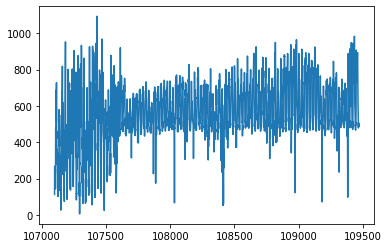

In [420]:
plt.plot(data['intensity'])

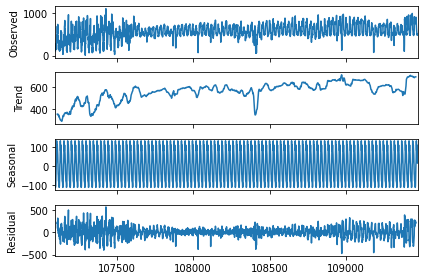

In [421]:
# Time-series decomposition
# Trend, seasonal, noise components
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore')

res = sm.tsa.seasonal_decompose(data['intensity'], freq = 24, model='additive')
res.plot()
plt.show()

In [422]:
# Nearest neighbor

In [423]:
data_entities.entity_type.unique()

array(['TrafficFlowObserved', 'NoiseLevelObserved', 'AirQualityObserved',
       'WeatherObserved'], dtype=object)

In [425]:
# Contains duplicates
data_entities = data_entities.drop_duplicates(subset = 'entity_id')
print(len(data_entities))

181


In [426]:
df = data_entities[data_entities['entity_type']=='TrafficFlowObserved'][['entity_id','latitude','longitude']].reset_index(drop = True)
df_aq = data_entities[data_entities['entity_type']=='AirQualityObserved'][['entity_id','latitude','longitude']].reset_index(drop = True)
df_nl = data_entities[data_entities['entity_type']=='NoiseLevelObserved'][['entity_id','latitude','longitude']].reset_index(drop = True)
df_w = data_entities[data_entities['entity_type']=='WeatherObserved'][['entity_id','latitude','longitude']].reset_index(drop = True)
df.shape, df_aq.shape, df_nl.shape, df_w.shape

((130, 3), (7, 3), (16, 3), (28, 3))

In [427]:
#!pip install haversine
from haversine import haversine
def nearest_neighbour(destination, sources):
    destination_loc = tuple(destination.values)
    distances = []
    sources_tuples = [tuple(x) for x in sources.values]
    for candidate in sources_tuples:
        dist = haversine(destination, candidate)
        distances.append(dist)
    result_idx = np.argmin(distances)
    return result_idx

In [428]:
df['aq_neighbor'] = df[['latitude','longitude']].apply(lambda row:nearest_neighbour(row,df_aq[['latitude','longitude']]), axis = 1)
df['nl_neighbor'] = df[['latitude','longitude']].apply(lambda row:nearest_neighbour(row,df_nl[['latitude','longitude']]), axis = 1)
df['w_neighbor'] = df[['latitude','longitude']].apply(lambda row:nearest_neighbour(row,df_w[['latitude','longitude']]), axis = 1)
print(len(df))
df.head()

130


,entity_id,latitude,longitude,aq_neighbor,nl_neighbor,w_neighbor
0,testsixsq,41.162590,-8.585198,2,12,15
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.148406,-8.599094,0,3,0
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.154960,-8.610091,0,4,6
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.158701,-8.633546,4,1,8
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.151096,-8.633818,3,1,6


In [429]:
df = df.merge(df_aq[['entity_id']], how = 'left', left_on = 'aq_neighbor', right_index = True, suffixes = ('','_aq'))
df = df.merge(df_nl[['entity_id']], how = 'left', left_on = 'nl_neighbor', right_index = True, suffixes = ('','_nl'))
df = df.merge(df_w[['entity_id']], how = 'left', left_on = 'w_neighbor', right_index = True, suffixes = ('','_w'))
print(len(df))
df.head()

130


,entity_id,latitude,longitude,aq_neighbor,nl_neighbor,w_neighbor,entity_id_aq,entity_id_nl,entity_id_w
0,testsixsq,41.162590,-8.585198,2,12,15,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.148406,-8.599094,0,3,0,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.154960,-8.610091,0,4,6,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:WeatherObserved:porto:weather:comm...
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.158701,-8.633546,4,1,8,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:WeatherObserved:porto:weather:comm...
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,41.151096,-8.633818,3,1,6,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:WeatherObserved:porto:weather:comm...


In [430]:
# This is the mapping which maps entity_id (traffic), to entity_id (air quality, aka 'aq')
#to entity_id (noise level, aka 'nl')
#to entity_id (weather observed, aka 'w')

df_entities_map = df[['entity_id','entity_id_aq','entity_id_nl','entity_id_w']]
print(len(df_entities_map))
df_entities_map.head()

130


,entity_id,entity_id_aq,entity_id_nl,entity_id_w
0,testsixsq,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:WeatherObserved:porto:weather:ubiw...
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:WeatherObserved:porto:weather:comm...
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:WeatherObserved:porto:weather:comm...
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:WeatherObserved:porto:weather:comm...


In [431]:
# Now we merge this info with main dataset

In [432]:
traffic_flow_grp.head()

,entity_id,observed_date,hour,intensity,latitude,longitude
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,0,20,41.148406,-8.599094
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,1,8,41.148406,-8.599094
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,2,4,41.148406,-8.599094
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,3,4,41.148406,-8.599094
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,4,5,41.148406,-8.599094


In [433]:
traffic_flow_grp_f = traffic_flow_grp.drop(['latitude','longitude'],axis=1)
print(len(traffic_flow_grp_f))
print(len(traffic_flow_grp_f.drop_duplicates()))

air_quality_grp_f = air_quality_grp.drop(['latitude','longitude'],axis=1)
air_quality_grp_f = air_quality_grp_f.rename(columns = {'entity_id':'entity_id_aq'})
print(len(air_quality_grp_f))
print(len(air_quality_grp_f.drop_duplicates()))

noise_level_grp_f = noise_level_grp.drop(['latitude','longitude'],axis=1)
noise_level_grp_f = noise_level_grp_f.rename(columns = {'entity_id':'entity_id_nl'})
print(len(noise_level_grp_f))
print(len(noise_level_grp_f.drop_duplicates()))

weather_observed_grp_f = weather_observed_grp.drop(['latitude','longitude'],axis=1)
weather_observed_grp_f = weather_observed_grp_f.rename(columns = {'entity_id':'entity_id_w'})
print(len(weather_observed_grp_f))
print(len(weather_observed_grp_f.drop_duplicates()))

183348
183348
13633
13633
33144
33144
15874
15874


In [452]:
data = traffic_flow_grp_f.merge(df_entities_map, how = 'left', on = 'entity_id')
data = data.merge(air_quality_grp_f, how = 'left', on = ['entity_id_aq','observed_date','hour'])
data = data.merge(noise_level_grp_f, how = 'left', on = ['entity_id_nl','observed_date','hour'])
data = data.merge(weather_observed_grp_f, how = 'left', on = ['entity_id_w','observed_date','hour'])
data

,entity_id,observed_date,hour,intensity,entity_id_aq,entity_id_nl,entity_id_w,no2,o3,ox,...,dewpoint,precipitation,relativehumidity,solarradiation,temperature,winddirection,windspeed,illuminance,uvindexmax,pressuretendency
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,0,20,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,38.00,55.67,95.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,1,8,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,36.48,59.75,97.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,2,4,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,35.92,58.60,96.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,3,4,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,36.28,59.95,97.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,4,5,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,32.65,68.25,102.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,5,1,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,32.33,69.38,103.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,6,21,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,31.78,68.83,101.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,7,20,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,34.10,67.22,102.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,8,69,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,37.57,67.12,106.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,9,84,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,42.02,69.77,113.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [453]:
data.columns

Index(['entity_id', 'observed_date', 'hour', 'intensity', 'entity_id_aq',
       'entity_id_nl', 'entity_id_w', 'no2', 'o3', 'ox', 'co', 'pm1', 'pm25',
       'pm10', 'laeq', 'barometricpressure', 'dewpoint', 'precipitation',
       'relativehumidity', 'solarradiation', 'temperature', 'winddirection',
       'windspeed', 'illuminance', 'uvindexmax', 'pressuretendency'],
      dtype='object')

In [454]:
data.isnull().sum()

entity_id                  0
observed_date              0
hour                       0
intensity                  0
entity_id_aq               0
entity_id_nl               0
entity_id_w                0
no2                     6604
o3                      6604
ox                      6604
co                      6604
pm1                     6604
pm25                    6604
pm10                    6604
laeq                   26087
barometricpressure    183348
dewpoint              183348
precipitation         181040
relativehumidity      181040
solarradiation        183348
temperature           181040
winddirection         181040
windspeed             181040
illuminance           183348
uvindexmax            181040
pressuretendency      183348
dtype: int64

In [455]:
# Drop ones which are totally unavailable or >90% null

In [456]:
# Impute as per latest value as on any particular date and hour

In [457]:
data = data.drop(['barometricpressure','dewpoint','illuminance','solarradiation','pressuretendency',
                 'precipitation','relativehumidity','temperature','winddirection','windspeed','uvindexmax'], axis = 1)
data

,entity_id,observed_date,hour,intensity,entity_id_aq,entity_id_nl,entity_id_w,no2,o3,ox,co,pm1,pm25,pm10,laeq
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,0,20,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,38.00,55.67,95.35,185.45,0.60,1.61,5.41,341.8
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,1,8,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,36.48,59.75,97.83,139.27,0.00,0.99,4.48,NaN
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,2,4,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,35.92,58.60,96.08,129.40,0.00,0.88,4.33,394.0
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,3,4,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,36.28,59.95,97.80,101.05,0.00,0.59,3.89,757.3
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,4,5,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,32.65,68.25,102.27,30.90,0.00,0.00,3.00,756.9
5,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,5,1,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,32.33,69.38,103.07,20.05,0.00,0.00,3.00,329.7
6,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,6,21,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,31.78,68.83,101.98,30.80,0.00,0.01,3.02,67.8
7,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,7,20,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,34.10,67.22,102.78,27.92,0.00,0.00,3.00,218.8
8,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,8,69,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,37.57,67.12,106.33,60.27,0.00,0.03,3.06,376.5
9,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,9,84,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,42.02,69.77,113.62,65.82,0.00,0.01,3.02,235.8


In [458]:
data.isnull().sum()

entity_id            0
observed_date        0
hour                 0
intensity            0
entity_id_aq         0
entity_id_nl         0
entity_id_w          0
no2               6604
o3                6604
ox                6604
co                6604
pm1               6604
pm25              6604
pm10              6604
laeq             26087
dtype: int64

In [459]:
data

,entity_id,observed_date,hour,intensity,entity_id_aq,entity_id_nl,entity_id_w,no2,o3,ox,co,pm1,pm25,pm10,laeq
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,0,20,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,38.00,55.67,95.35,185.45,0.60,1.61,5.41,341.8
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,1,8,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,36.48,59.75,97.83,139.27,0.00,0.99,4.48,NaN
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,2,4,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,35.92,58.60,96.08,129.40,0.00,0.88,4.33,394.0
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,3,4,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,36.28,59.95,97.80,101.05,0.00,0.59,3.89,757.3
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,4,5,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,32.65,68.25,102.27,30.90,0.00,0.00,3.00,756.9
5,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,5,1,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,32.33,69.38,103.07,20.05,0.00,0.00,3.00,329.7
6,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,6,21,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,31.78,68.83,101.98,30.80,0.00,0.01,3.02,67.8
7,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,7,20,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,34.10,67.22,102.78,27.92,0.00,0.00,3.00,218.8
8,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,8,69,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,37.57,67.12,106.33,60.27,0.00,0.03,3.06,376.5
9,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,9,84,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,42.02,69.77,113.62,65.82,0.00,0.01,3.02,235.8


In [460]:
# Impute by first available value in past

In [461]:
for i in ['no2','o3','ox','co','pm1','pm25','pm10','laeq']:
    data[i] = data[i].fillna(method='ffill')
data

,entity_id,observed_date,hour,intensity,entity_id_aq,entity_id_nl,entity_id_w,no2,o3,ox,co,pm1,pm25,pm10,laeq
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,0,20,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,38.00,55.67,95.35,185.45,0.60,1.61,5.41,341.8
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,1,8,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,36.48,59.75,97.83,139.27,0.00,0.99,4.48,341.8
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,2,4,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,35.92,58.60,96.08,129.40,0.00,0.88,4.33,394.0
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,3,4,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,36.28,59.95,97.80,101.05,0.00,0.59,3.89,757.3
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,4,5,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,32.65,68.25,102.27,30.90,0.00,0.00,3.00,756.9
5,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,5,1,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,32.33,69.38,103.07,20.05,0.00,0.00,3.00,329.7
6,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,6,21,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,31.78,68.83,101.98,30.80,0.00,0.01,3.02,67.8
7,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,7,20,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,34.10,67.22,102.78,27.92,0.00,0.00,3.00,218.8
8,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,8,69,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,37.57,67.12,106.33,60.27,0.00,0.03,3.06,376.5
9,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:...,2020-12-31,9,84,urn:ngsi-ld:AirQualityObserved:porto:environme...,urn:ngsi-ld:NoiseLevelObserved:porto:noise:ubi...,urn:ngsi-ld:AirQualityObserved:porto:weather:u...,42.02,69.77,113.62,65.82,0.00,0.01,3.02,235.8


In [463]:
data.isnull().sum()

entity_id        0
observed_date    0
hour             0
intensity        0
entity_id_aq     0
entity_id_nl     0
entity_id_w      0
no2              0
o3               0
ox               0
co               0
pm1              0
pm25             0
pm10             0
laeq             0
dtype: int64

In [464]:
# Now apply VAR method (Vector auto regression)

In [466]:
data_f = data.drop(['entity_id','observed_date','hour','entity_id_aq','entity_id_nl','entity_id_w'],axis=1)
data_f.head()

,intensity,no2,o3,ox,co,pm1,pm25,pm10,laeq
0,20,38.00,55.67,95.35,185.45,0.6,1.61,5.41,341.8
1,8,36.48,59.75,97.83,139.27,0.0,0.99,4.48,341.8
2,4,35.92,58.60,96.08,129.40,0.0,0.88,4.33,394.0
3,4,36.28,59.95,97.80,101.05,0.0,0.59,3.89,757.3
4,5,32.65,68.25,102.27,30.90,0.0,0.00,3.00,756.9


In [475]:
data_f.describe()

,intensity,no2,o3,ox,co,pm1,pm25,pm10,laeq
count,183348.000000,183348.000000,183348.000000,183348.000000,183348.000000,183348.000000,183348.000000,183348.000000,183348.000000
mean,324.691407,41.612421,42.406201,85.608274,252.624787,4.817543,5.299875,11.492865,735.332638
std,1899.278133,14.976974,21.855363,24.591196,227.473349,10.887016,9.832450,16.453587,229.957519
min,1.000000,0.000000,0.000000,9.650000,0.620000,0.000000,0.000000,3.000000,58.700000
25%,27.000000,32.050000,27.080000,68.520000,114.520000,0.000000,0.650000,4.000000,694.900000
50%,113.000000,40.570000,44.100000,86.600000,181.600000,1.070000,2.000000,6.000000,789.500000
75%,283.000000,49.200000,57.570000,103.180000,301.730000,5.150000,5.710000,11.840000,844.400000
max,53763.000000,143.720000,132.090000,186.030000,2464.100000,350.000000,112.930000,221.410000,1677.900000


In [557]:
# Creating the train and validation set
# We are keeping first 90% period as training,
# And rest are validation

train = data_f[:int(0.9*(len(data_f)))]
valid = data_f[int(0.9*(len(data_f))):]

In [565]:
# Auto-ARIMA
#!pip install pmdarima

from pmdarima import auto_arima

model = auto_arima(train, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['intensity'])

# Plotting the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

  Using cached pmdarima-1.8.2.tar.gz (1.0 MB)
  Using cached scikit_learn-0.24.2-cp37-cp37m-macosx_10_13_x86_64.whl (7.2 MB)
  Using cached statsmodels-0.12.2.tar.gz (17.5 MB)
  Installing build dependencies ... done
^C
  Getting requirements to build wheel ... canceled
ERROR: Operation cancelled by user
You should consider upgrading via the '/Users/shubhamjangir/anaconda3/bin/python -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'pmdarima'

In [562]:
# VAR Model
# Now, fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# Make prediction on validation
#prediction = model_fit.forecast(model_fit.y, steps=len(valid))

# For next 24 steps
prediction = model_fit.forecast(model_fit.y, steps=24)
len(prediction)

24

In [510]:
#make final predictions
model = VAR(endog=data_f)
model_fit = model.fit()
prediction = model_fit.forecast(model_fit.y, steps=24)
print(len(prediction))

24


In [511]:
prediction.shape

(24, 9)

In [512]:
prediction_df = pd.DataFrame(prediction, columns = data_f.columns)
prediction_df.describe()

,intensity,no2,o3,ox,co,pm1,pm25,pm10,laeq
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,244.553690,39.085424,30.381427,70.754386,210.319514,3.774582,3.927518,9.609248,731.964145
std,65.401229,3.639405,4.107878,7.735384,22.440130,0.817158,0.698804,1.403421,9.752784
min,68.525353,30.062120,22.463007,53.728487,177.978501,3.180323,3.374816,8.603025,704.169371
25%,219.947880,37.332716,27.356856,65.899151,189.711468,3.253350,3.464854,8.733260,729.538868
50%,272.523579,40.704556,31.036612,73.022964,211.945068,3.442653,3.685037,9.033065,737.042221
75%,292.052532,41.910277,33.823331,77.089312,230.457246,3.812836,3.996018,9.754660,738.366491
max,300.129511,42.122526,35.929690,79.466105,242.205464,6.209408,6.065813,13.728060,738.505010


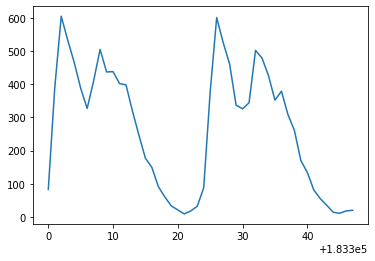

In [513]:
# Last 48 hours value in base dataset
plt.plot(data_f['intensity'].tail(48))

In [519]:
data_f.tail(5)

,intensity,no2,o3,ox,co,pm1,pm25,pm10,laeq
183343,35,29.53,24.88,55.70,228.20,9.14,8.90,20.02,720.2
183344,14,29.17,21.45,51.85,203.67,8.16,7.90,17.48,700.1
183345,11,27.65,23.15,51.93,185.75,6.89,6.71,14.83,690.0
183346,18,26.45,23.35,50.98,168.48,6.75,6.58,14.59,673.5
183347,20,28.25,21.45,50.92,179.32,6.93,6.76,14.90,696.2


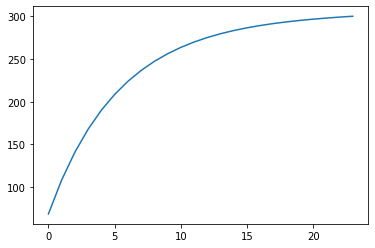

In [514]:
# Next 24hrs prediction
plt.plot(prediction_df['intensity'])

In [515]:
# Seasonality is not handled by default in VAR, so we can introduce it separately
# by Hourly index

In [516]:
data_avg = data['intensity'].mean()
data_avg

324.69140650566135

In [518]:
data_hour_avg = data.groupby(['hour'])['intensity'].mean().reset_index()
data_hour_avg['hour_seasonality'] = data_hour_avg['intensity']/data_avg
data_hour_avg

,hour,intensity,hour_seasonality
0,0,140.634985,0.433134
1,1,133.541139,0.411286
2,2,136.642547,0.420838
3,3,151.378238,0.466222
4,4,155.100617,0.477686
5,5,149.270299,0.459730
6,6,180.671531,0.556441
7,7,313.125692,0.964379
8,8,434.480373,1.338133
9,9,477.090604,1.469366


In [521]:
# Since latest hour was 5am in data, so next 24steps are 6-24

In [528]:
prediction_df['hour'] = (np.arange(0,24)+6)%24
prediction_df

,intensity,no2,o3,ox,co,pm1,pm25,pm10,laeq,hour
0,68.525353,30.062120,22.463007,53.728487,177.978501,6.209408,6.065813,13.728060,704.169371,6
1,108.249543,31.696808,23.422684,56.313315,178.010765,5.595456,5.480149,12.723764,710.813512,7
2,140.882894,33.163435,24.332936,58.686399,179.150051,5.076679,4.990910,11.869875,716.327888,8
3,167.779803,34.472138,25.197192,60.860158,181.164625,4.642483,4.586953,11.150323,720.882299,9
4,190.016940,35.633514,26.018483,62.847259,183.854436,4.283117,4.258056,10.550196,724.623822,10
5,208.453742,36.658367,26.799499,64.660386,187.047973,3.989643,3.994891,10.055735,727.679482,11
6,223.779259,37.557499,27.542641,66.312073,190.599299,3.753900,3.788973,9.654302,730.158663,12
7,236.548466,38.341544,28.250066,67.814554,194.385297,3.568472,3.632622,9.334342,732.155269,13
8,247.210456,39.020839,28.923725,69.179659,198.303095,3.426642,3.518918,9.085344,733.749657,14
9,256.130373,39.605323,29.565392,70.418728,202.267702,3.322356,3.441648,8.897783,735.010366,15


In [529]:
prediction_df = prediction_df.merge(data_hour_avg[['hour','hour_seasonality']], how = 'left', on = ['hour'])
prediction_df

,intensity,no2,o3,ox,co,pm1,pm25,pm10,laeq,hour,hour_seasonality
0,68.525353,30.062120,22.463007,53.728487,177.978501,6.209408,6.065813,13.728060,704.169371,6,0.556441
1,108.249543,31.696808,23.422684,56.313315,178.010765,5.595456,5.480149,12.723764,710.813512,7,0.964379
2,140.882894,33.163435,24.332936,58.686399,179.150051,5.076679,4.990910,11.869875,716.327888,8,1.338133
3,167.779803,34.472138,25.197192,60.860158,181.164625,4.642483,4.586953,11.150323,720.882299,9,1.469366
4,190.016940,35.633514,26.018483,62.847259,183.854436,4.283117,4.258056,10.550196,724.623822,10,1.435792
5,208.453742,36.658367,26.799499,64.660386,187.047973,3.989643,3.994891,10.055735,727.679482,11,1.389904
6,223.779259,37.557499,27.542641,66.312073,190.599299,3.753900,3.788973,9.654302,730.158663,12,1.372969
7,236.548466,38.341544,28.250066,67.814554,194.385297,3.568472,3.632622,9.334342,732.155269,13,1.428130
8,247.210456,39.020839,28.923725,69.179659,198.303095,3.426642,3.518918,9.085344,733.749657,14,1.424791
9,256.130373,39.605323,29.565392,70.418728,202.267702,3.322356,3.441648,8.897783,735.010366,15,1.442139


In [530]:
prediction_df['adjusted_intensity'] = prediction_df['intensity']*prediction_df['hour_seasonality']
prediction_df

,intensity,no2,o3,ox,co,pm1,pm25,pm10,laeq,hour,hour_seasonality,adjusted_intensity
0,68.525353,30.062120,22.463007,53.728487,177.978501,6.209408,6.065813,13.728060,704.169371,6,0.556441,38.130299
1,108.249543,31.696808,23.422684,56.313315,178.010765,5.595456,5.480149,12.723764,710.813512,7,0.964379,104.393625
2,140.882894,33.163435,24.332936,58.686399,179.150051,5.076679,4.990910,11.869875,716.327888,8,1.338133,188.520088
3,167.779803,34.472138,25.197192,60.860158,181.164625,4.642483,4.586953,11.150323,720.882299,9,1.469366,246.529985
4,190.016940,35.633514,26.018483,62.847259,183.854436,4.283117,4.258056,10.550196,724.623822,10,1.435792,272.824813
5,208.453742,36.658367,26.799499,64.660386,187.047973,3.989643,3.994891,10.055735,727.679482,11,1.389904,289.730770
6,223.779259,37.557499,27.542641,66.312073,190.599299,3.753900,3.788973,9.654302,730.158663,12,1.372969,307.241954
7,236.548466,38.341544,28.250066,67.814554,194.385297,3.568472,3.632622,9.334342,732.155269,13,1.428130,337.821877
8,247.210456,39.020839,28.923725,69.179659,198.303095,3.426642,3.518918,9.085344,733.749657,14,1.424791,352.223311
9,256.130373,39.605323,29.565392,70.418728,202.267702,3.322356,3.441648,8.897783,735.010366,15,1.442139,369.375489


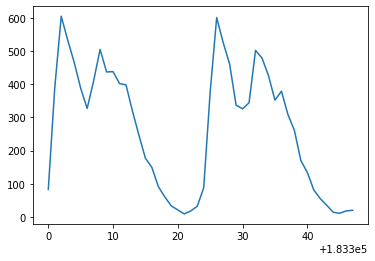

In [545]:
# So again, Last 48 hours value in base dataset
plt.plot(data_f['intensity'].tail(48))
plt.show()

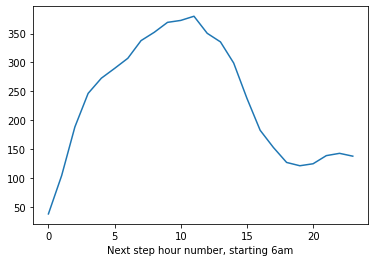

In [546]:
# Adjusted 24hrs prediction
plt.plot(prediction_df['adjusted_intensity'])
plt.xlabel('Next step hour number, starting 6am')
plt.show()

In [547]:
# As we can see, now it adjusts to seasonality

## Conclusions
Our approach is mainly
- Imorting data and dropping duplicates if any
- Defining period at hour level, and aggregating at that level (sum or mean, as required)
- Whereever suplementary (air quality, noise level, weather observed) is not available for a particular location, we impute via nearest location that they are available
- We then combined all data-sets at entity_id (location), date, hour level
- Wherever we find missing values in any column, we impute it by value available latest to it (for example value of yesterday/day before, if not present for today)
- We model it using VAR (Vector auto regression) which does multi-variate forecasting, taking all features time series into consideration
- We predict it for next 24 hours (starting 6AM)
- We find via time series decomposition that 24hrs seasonality exists
- We adjust the predictions via seasonality factor, and report predictions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

- This solution is scalable in the sense that it can handle multiple data sources and features, if we are to augment any other external data sources, recorded at location, day, hour level
- Possible limitation of this solution is the sensitivity. Here we model it at hour level, but sometimes predictions can be required at period smaller tha that, and with greater precision

- Social impact of this solution is to be able to forecast traffic level, and then plan in advance resources, traffic planning and big events if they are affected or in-fact affect the traffic.

### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀
- Future work would be to impute missing values for features where there was no value present for any period. This would require taking help of outside data sources, scrapping, transforming and using them.
- Future work also is to be able to better model seasonality with greater precision.